In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

# matplotlib 폰트설정
plt.rc('font', family='NanumGothicOTF') # For MacOS
matplotlib.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])

['NanumGothicOTF']


In [2]:
# 반올림하여 소수점 네 자리까지만 표현
np.set_printoptions(precision=4)

# 1. 신경망 기초 1

신경망이란 무엇인가?
- 신경망은 입력과 출력을 갖는 함수다.
- 신경망은 다차원 배열이 흘러가는 계산 그래프다.
- 신경망은 여러 개의 층으로 구성되며, 층은 다시 여러 개의 뉴런으로 구성된다.
- 신경망은 어떤 함수라도 근사할 수 있는 능력(universal function approximator)이 있으며, 이론적으로 모든 지도 학습 문제를 풀 수 있다.

신경망의 기본적인 구성 요소를 다음 세 가지 관점에서 설명함
- 수식
- 코드
- 다이어그램

## 1.1 함수

### 1.1.1 수식

$ f_1(x) = x^2 $

$ f_2(x) = max(x, 0) $

### 1.1.2 다이어그램

2차원 평면에 그려지는 그래프

입력값 -> 상자 -> 출력값

### 1.1.3 코드

In [3]:
# 코드 사용법 #1. 넘파이
# 넘파이는 고속 수치 연산 분야에서 널리 사용되는 라이브러리, 내부 대부분이 C 언어로 구현되어 있음
# 신경망에서 우리가 다룰 데이터는 모두 다차원 배열(multidimensional array)
# 넘파이의 ndarray 클래스를 사용하면 다차원 배열을 직관적이고 효율적으로 다룰 수 있음

print('파이썬 리스트를 사용한 연산:')
a = [1, 2, 3]
b = [4, 5, 6]
print('a+b: ', a+b)
try:
    print(a*b)
except TypeError:
    print('파이썬 리스트에 대해 a*b 연산 불가')
print()
print('넘파이 배열을 사용한 연산:')
a = np.array(a)
b = np.array(b)
print('a+b: ', a+b)
print('a*b: ', a*b)

파이썬 리스트를 사용한 연산:
a+b:  [1, 2, 3, 4, 5, 6]
파이썬 리스트에 대해 a*b 연산 불가

넘파이 배열을 사용한 연산:
a+b:  [5 7 9]
a*b:  [ 4 10 18]


In [4]:
a = np.array([[1, 2],
              [3, 4]])
print('a: ')
print(a)
print('각 열의 합:', a.sum(axis=0)) # axis=0: 열
print('각 행의 합:', a.sum(axis=1)) # axis=1: 행

a: 
[[1 2]
 [3 4]]
각 열의 합: [4 6]
각 행의 합: [3 7]


In [5]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

b = np.array([10, 20, 30])

print('a+b:\n', a+b)

a+b:
 [[11 22 33]
 [14 25 36]]


In [6]:
# 코드 사용법 #2. 타입을 확인하는 함수
# 함수의 타입 시그니처를 정의하자

def f1(x: int, y: int) -> int:
    return x+y

print(f1(1,2))

def f2(x1: ndarray, x2: ndarray) -> ndarray:
    return x1*x2

a = np.array([1, 2, 3])
b = np.array([10, 20, 30])

print(f2(a, b))

3
[10 40 90]


In [7]:
# 넘파이로 간단한 함수 구현하기

def square(x: ndarray) -> ndarray:
    return np.power(x, 2) # 각 요솟값 제곱하기

def leaky_relu(x: ndarray) -> ndarray:
    return np.maximum(0.2 * x, x) # relu에서 음수는 모두 0이 됨 -> 이를 해결하기 위해 음수를 약간 반영하는 leaky relu가 나옴

## 1.2 도함수

### 1.2.1 수식

$$ \frac{df}{dx}(a) = \lim_{\Delta \to 0} \frac{{f \left( {a + \Delta } \right) - f\left( a - \Delta \right)}}{2 * \Delta } $$

### 1.2.1 다이어그램

그래프의 두 점을 잇는 직선의 기울기 구하기

함수의 입력값 약간 증가 -> 상자 -> 출력값 얼마나 변화?

### 1.2.3 코드

In [8]:
# Callable[[인자 타입 리스트], 반환 타입]: 함수 인자에 다른 함수를 넘겨 줄 때 사용
def deriv(func: Callable[[ndarray], ndarray],
         input_: ndarray,
         delta: float = 0.001) -> ndarray: # 0.001은 아주 작은 수를 의미
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

In [9]:
deriv(square, 2) # f = x^2에서 x=2에서의 도함수값

3.9999999999995595

## 1.3 합성함수

### 1.3.1 다이어그램

입력값 -> f1 -> f2 -> 출력값

### 1.3.2 수식

$$ f_2(f_1(x)) = y $$

### 1.3.3 코드

In [10]:
from typing import List # 파이썬 내장 자료 구조 리스트에 대한 타입을 명시(앞에 List라고 써주기 위함)

# ndarray를 인자로 받고 ndarray를 반환하는 함수
Array_Function = Callable[[ndarray], ndarray]

# Chain은 함수의 리스트
Chain = List[Array_Function]

In [11]:
def chain_length_2(chain: Chain,
                  x: ndarray) -> ndarray:
    assert len(chain) == 2 # 가정 설정문(assert): len(chain) == 2가 False면 AssertError 발생
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

In [12]:
fff = [square, leaky_relu]
chain_length_2(fff, 5)

25.0

### 1.3.4 두 번째 다이어그램

입력값 -> f1f2(합성함수) -> 출력값

## 1.4 연쇄법칙

합성함수의 도함수를 계산

### 1.4.3 코드

In [13]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-x))

In [14]:
def chain_deriv_2(chain: Chain,
                 input_range: ndarray) -> ndarray:
    assert len(chain) == 2
    assert input_range.ndim == 1 # input_range는 1차원 ndarray여야 함
    
    f1 = chain[0]
    f2 = chain[1]
    
    df1dx = deriv(f1, input_range)
    
    df2du = deriv(f2, f1(input_range))
    
    return df1dx * df2du

In [15]:
def f(x: ndarray) -> ndarray:
    return np.power(x, 2)
def g(x: ndarray) -> ndarray:
    return np.multiply(x, 3)

In [16]:
func = [f, g]
r = np.array([1,2,3])
chain_deriv_2(func, r) # g(f) = 3x^2 -> 도함수 = 6x

array([ 6., 12., 18.])

In [18]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    assert input_range.ndim == 1

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [19]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:

    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


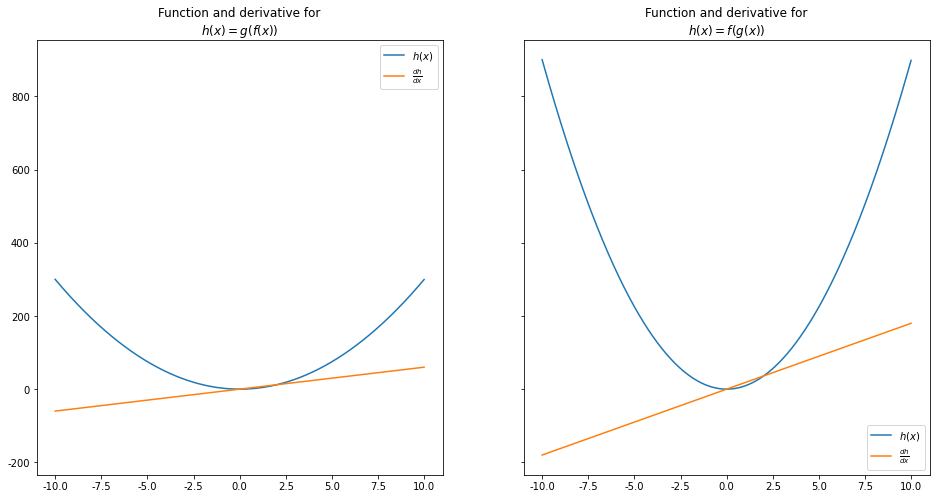

In [20]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [f, g]
chain_2 = [g, f]

PLOT_RANGE = np.arange(-10, 10, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$h(x)$", "$\\frac{dh}{dx}$"])
ax[0].set_title("Function and derivative for\n$h(x) = g(f(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$h(x)$", "$\\frac{dh}{dx}$"])
ax[1].set_title("Function and derivative for\n$h(x) = f(g(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

## 1.5 조금 더 복잡한 예제

함수가 세 개 이상이어도 똑같음

## 1.6 입력이 두 개 이상인 함수의 합성함수

### 1.6.3 코드

In [21]:
def multiple_inputs_add(x: ndarray, y: ndarray, sigma: Array_Function) -> float:
    assert x.shape == y.shape
    
    a = x + y
    return sigma(a)

In [22]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
f = lambda e: e**2

multiple_inputs_add(a, b, f) # f(a+b)

array([ 121,  484, 1089])

## 1.7 입력이 여러 개인 함수의 도함수

In [23]:
def multiple_inputs_add_backward(x: ndarray, y: ndarray, sigma: Array_Function) -> float:
    a = x + y
    
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

In [24]:
multiple_inputs_add_backward(a, b, f)

(array([22., 44., 66.]), array([22., 44., 66.]))

편미분(偏微分, 영어: partial derivative)은 다변수 함수의 특정 변수를 제외한 나머지 변수를 상수로 간주하여 미분하는 것이다.

$ f = (a+b)^2 $

$ \frac{∂f}{∂a} = 2(a+b)(1+\frac{∂b}{∂a}) $

$ \frac{∂f}{∂b} = 2(a+b)(\frac{∂a}{∂b} + 1) $

$ \frac{∂b}{∂a} = 0, \frac{∂a}{∂b} = 0 $

## 1.8 여러 개의 벡터 입력을 갖는 함수

딥러닝에서는 벡터나 행렬을 입력으로 받는 함수를 주로 다룸

$ X = [x_1, x_2, ..., x_n] $

## 1.9 기존 특징으로 새로운 특징 만들기

신경망에서 가장 많이 사용되는 연산은 특징의 가중합(weighted sum)을 구하는 연산임 -> 이 가중합은 특정한 특징의 비중을 늘리거나 줄이는 방법 -> 기존 특징을 조합해 새로운 특징을 만듦

### 1.9.1 수식

$ W = \begin{bmatrix} w_{1} \\ w_{2} \\.\\.\\.\\ w_{n}\end{bmatrix} $

$ N = X \times W = x_1*w_1 + x_2*w_2 + ... + x_n*w_n $

## *** numpy에서 dot과 matmul

- A.shape = (a1, b1, c1)
- B.shape = (a2, b2, c2)
- (차원, 행, 열)
- 결과 = C

1. np.dot(A, B)

- c1과 b2가 같아야함
- C.shape = (a1, b1, a2, c2)
- 공식
$$ C[i,j,k,m] = np.sum(A[i,j,:] * B[k,:,m]) $$

2. np.matmul(A, B)

- a1과 a2가 같아야함
- c1과 b2가 같아야함
- C.shape = (a1, b1, c2)
- 공식
$$ C[i,j,k] = np.sum(A[i,j,:] * B[i,:,k]) $$


In [25]:
'''{0}aa{1}'''.format('____', '****')

'____aa****'

### 1.9.3 코드

In [26]:
# 순방향 계산을 행렬곱으로 계산
def matmul_forward(X: ndarray, W: ndarray) -> ndarray:
    assert X.shape[1] == W.shape[0]
    
    # matrix multiplication
    N = np.matmul(X, W)

    return N

In [27]:
a = np.arange(1,10,1).reshape(3,3)
b = np.arange(1,13,1).reshape(3,4)
c = np.arange(1,13,1).reshape(4,3)

In [28]:
matmul_forward(a,b)

array([[ 38,  44,  50,  56],
       [ 83,  98, 113, 128],
       [128, 152, 176, 200]])

In [29]:
try:
    matmul_forward(a,c)
except AssertionError:
    print('fail')

fail


## 1.10 여러 개의 벡터 입력을 갖는 함수의 도함수

$ ν(X, W) = N = x_1*w_1 + x_2*w_2 + x_3*w_3 $

## $ \frac{∂ν}{∂X} = \begin{bmatrix} \frac{∂ν}{∂x_1} & \frac{∂ν}{∂x_2} & \frac{∂ν}{∂x_3} \end{bmatrix} = \begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix} = W^T $

-> X에 대해 편미분 -> X의 shape으로 나옴 -> W를 transpose해야하겠지

전치 행렬(transposed matrix)은 그 행렬을 주대각선을 기준으로 하여 뒤집어 얻을 수 있다.

마찬가지로

## $ \frac{∂ν}{∂W} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = X^T $

### 1.10.3 코드

In [30]:
def matmul_backward_first(X: ndarray, W: ndarray) -> ndarray:
    dNdX = np.transpose(W, (1, 0))
    
    return dNdX

## 1.11 벡터 함수와 도함수

### 1.11.3 코드

In [31]:
def matrix_forward_extra(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    # 행렬곱이 포함된 함수와 또 다른 함수의 합성함수에 대한 순방향 계산을 수행
    
    assert X.shape[1] == W.shape[0]
    
    # 행렬곱
    N = np.matmul(X, W)
    
    # 행렬곱의 출력을 함수 sigma의 입력값으로 전달
    S = sigma(N)
    
    return S

In [32]:
a = np.arange(1,10,1).reshape(3,3)
b = np.arange(1,13,1).reshape(3,4)
f = lambda x: x**2
# f(a·b)
matrix_forward_extra(a, b, f)

array([[ 1444,  1936,  2500,  3136],
       [ 6889,  9604, 12769, 16384],
       [16384, 23104, 30976, 40000]])

### 1.11.4 역방향 계산

In [33]:
# 코드

def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

In [34]:
a = np.arange(1,10,1).reshape(3,3)
b = np.arange(1,13,1).reshape(3,4)
f = lambda x: x**2

# 제곱함수와 점곱함수의 합성함수를 a에 대해 편미분하기
matrix_function_backward_1(a, b, f)

array([[ 1000.,  2504.,  4008.],
       [ 2260.,  5636.,  9012.],
       [ 3520.,  8768., 14016.]])